In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
# import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict

In [4]:
hour_df = pd.read_csv('hour.csv')
print hour_df.shape
print hour_df.dtypes

(17379, 17)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [5]:
hour_df.rename(columns={'instant':'rec_id',
                            'dteday':'datetime',
                            'holiday':'is_holiday',
                            'workingday':'is_workingday',
                            'weathersit':'weather_condition',
                            'hum':'humidity',
                            'mnth':'month',
                            'cnt':'total_count',
                            'hr':'hour',
                            'yr':'year'},inplace=True)



In [6]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)
# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

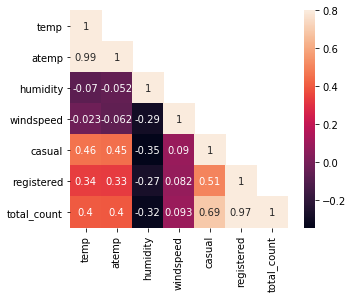

In [7]:
corrMatt = hour_df[["temp","atemp",
                             "humidity","windspeed",
                            "casual","registered",
                             "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
vmax=.8, square=True,annot=True)

In [8]:
print hour_df.dtypes


rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object


In [9]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(hour_df.iloc[:,0:-3],
                                       hour_df.iloc[:,-1],
                                       test_size=0.33,
                                       random_state=42)
print X_train.shape
X = X_train
X = X.append(X_test)
# predicted = cross_val_predict(reg, X)
print X.shape

(11643, 14)
(17379, 14)


In [10]:
cat_attr_list = ['season','is_holiday',
               'weather_condition','is_workingday',
                 'hour','weekday','month','year']

for i in cat_attr_list:
    dum = pd.get_dummies(X[i],prefix = i)
    X = pd.concat([X,dum],axis = 1 )
    X.drop(i,axis = 1,inplace = True)
print X.shape


(17379, 63)


In [11]:
print X.dtypes

rec_id                          int64
datetime               datetime64[ns]
temp                          float64
atemp                         float64
humidity                      float64
windspeed                     float64
season_1                        uint8
season_2                        uint8
season_3                        uint8
season_4                        uint8
is_holiday_0                    uint8
is_holiday_1                    uint8
weather_condition_1             uint8
weather_condition_2             uint8
weather_condition_3             uint8
weather_condition_4             uint8
is_workingday_0                 uint8
is_workingday_1                 uint8
hour_0                          uint8
hour_1                          uint8
hour_2                          uint8
hour_3                          uint8
hour_4                          uint8
hour_5                          uint8
hour_6                          uint8
hour_7                          uint8
hour_8      

In [12]:
X_train = X.head(11643)
X_test = X.iloc[11643::]
X_train.fillna(0)
X_test.fillna(0)
# print X_train["humidity"]
X_train.drop('datetime',axis = 1, inplace = True)
X_test.drop('datetime',axis = 1, inplace = True)

reg = LinearRegression().fit(X_train,y_train)
pred = reg.predict(X_test)

print r2_score(pred,y_test)

0.5318304192747559


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
reg = DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
             }
# pred = reg.predict(X_test)
grid_cv_dtr = GridSearchCV(reg, param_grid, cv=5)
grid_cv_dtr.fit(X_train,y_train)
print("R-Squared::{}".format(grid_cv_dtr.best_params_))
# print r2_score(pred,y_test)


KeyboardInterrupt: 